In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc("figure", dpi=100)

In [5]:
path = pathlib.Path("/home/maurosilber/Dropbox/UBA/Labo1/metronomo/")

df = []
for file in path.iterdir():
    x = pd.read_csv(file, header=None, comment="#")
    group, name = file.stem.split("_", 1)
    df.append({"name": name, "group": group, "period": np.squeeze(x.values), "file": file})

df = pd.DataFrame(df)

In [7]:
trim_period = df.period.apply(lambda x: np.concatenate((x[1:22], x[24:-1])))
df["N"] = trim_period.apply(np.size)
df["promedio"] = trim_period.apply(np.mean)
df["desv_est"] = trim_period.apply(np.std)
df["error_promedio"] = df.desv_est / np.sqrt(df.N)
df["error_desv_est"] = df.desv_est / np.sqrt(2 * (df.N-1))

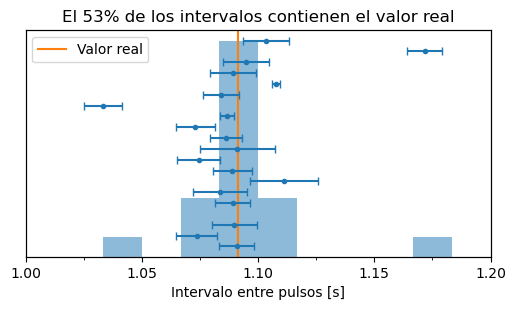

In [9]:
real = 1.09133787

fig, ax = plt.subplots(figsize=(6, 3), facecolor="w")

ax.set_xlabel("Intervalo entre pulsos [s]")
ax.set_xlim(1, 1.2)
ax.axvline(real, color="C1", label="Valor real")

ax.hist(df.promedio, bins=np.linspace(1, 1.2, 13), alpha=0.5, color="C0")
ax.set_yticks(())

ax_twin = ax.twinx()
ax_twin.errorbar(df.promedio, df.index, xerr=df.error_promedio, fmt=".", capsize=3)
ax_twin.set_yticks(())

contienen = np.abs(real - df.promedio) < df.error_promedio
frac = contienen.sum() / (contienen.size - 1)
ax.set_title(f"El {frac:.0%} de los intervalos contienen el valor real")

ticks = np.linspace(1, 1.2, 9)
ax.set_xticks(ticks[::2], minor=False)
ax.set_xticks(ticks[1::2], minor=True)

ax.legend(loc="upper left")

Text(0.5, 1.0, 'El tiempo de respuesta es: (51 ± 6) ms')

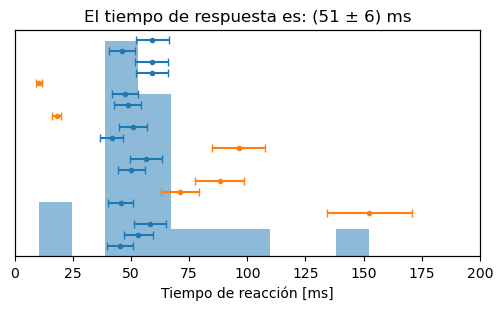

In [11]:
fig, ax = plt.subplots(figsize=(6, 3), facecolor="w")
ax_twin = ax.twinx()

mask = df.desv_est.between(0.03, 0.07)

escala = 1000
ax.set_xlabel("Tiempo de reacción [ms]")
ax.set_xlim(0, 0.2 * escala)

ax.hist(df.desv_est * escala, bins=10, alpha=0.5)

for m in (mask, ~mask):
    dg = df[m]
    ax_twin.errorbar(dg.desv_est * escala, dg.index, xerr=dg.error_desv_est * escala, fmt=".", capsize=3)

ax.set_yticks(())
ax_twin.set_yticks(())

x = df.desv_est[mask] * escala
ax.set_title(f"El tiempo de respuesta es: ({x.mean():.0f} ± {x.std():.0f}) ms")